# Spillover Analysis of Control Groups with and without Treated Neighbors

In this analysis, we explore the potential spillover effects among control groups with and without neighbors who received the SBCC treatment. The analysis includes performing t-tests and plotting the results to visualize differences in cooking behaviors over time.

## Import Libraries

```python
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Explanation of the following code:

1. **Data Loading**: The dataset is loaded using pandas.
2. **Statistical Testing**: A function is defined to perform t-tests for the differences in means between the groups.
3. **Visualization**: The results are plotted using bar charts to illustrate mean differences with error bars.
4. **ANOVA Analysis**: ANOVA is used to test for statistically significant differences in the outcome variables.

This report-style presentation helps clarify each step of the analysis, making it easier to understand the methodology and interpret the results.

In [48]:
# Load the dataset
data = pd.read_csv('final_data.csv')

/var/folders/kj/2hjk7hzn2qz7f8rsq4mzqnm40000gp/T/ipykernel_62847/1870937404.py:2: DtypeWarning: Columns (84,291,317,325,330,331,342,347,726,729,740,775,1003) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('final_data.csv')


In [37]:
def perform_ttest(group1, group2, variable):
    """
    Perform an independent t-test between two groups for a given variable.

    Parameters:
    group1: pd.Series
        Data for group 1.
    group2: pd.Series
        Data for group 2.
    variable: str
        The variable to perform the t-test on.

    Returns:
    tuple: t-statistic, p-value, mean of group1, mean of group2
    """
    group1_data = data[group1][variable].dropna()
    group2_data = data[group2][variable].dropna()
    t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False)  # assuming unequal variance
    return t_stat, p_val, np.mean(group1_data), np.mean(group2_data)

In [39]:
# Define the variables of interest for analysis
variables_of_interest_days = ['diff_G1_days', 'diff_G2_days', 'diff_G3_days', 'diff_G5_days']
variables_of_interest_cooked = ['diff_G1_cooked', 'diff_G2_cooked', 'diff_G3_cooked', 'diff_G5_cooked']

# Initialize dictionaries to store results
results_days = {}
results_cooked = {}

# Perform t-tests for each variable of interest
for variable in variables_of_interest_days:
    t_stat, p_val, mean_control, mean_treatment = perform_ttest(
        data['control_with_neighbor_500'], data['control_without_neighbor_500'], variable)
    results_days[variable] = {
        't_stat': t_stat,
        'p_val': p_val,
        'mean_control_with_neighbor_SBCC': mean_control,
        'mean_control_without_neighbor_SBCC': mean_treatment
    }

for variable in variables_of_interest_cooked:
    t_stat, p_val, mean_control, mean_treatment = perform_ttest(
        data['control_with_neighbor_500'], data['control_without_neighbor_500'], variable)
    results_cooked[variable] = {
        't_stat': t_stat,
        'p_val': p_val,
        'mean_control_with_neighbor_SBCC': mean_control,
        'mean_control_without_neighbor_SBCC': mean_treatment
    }


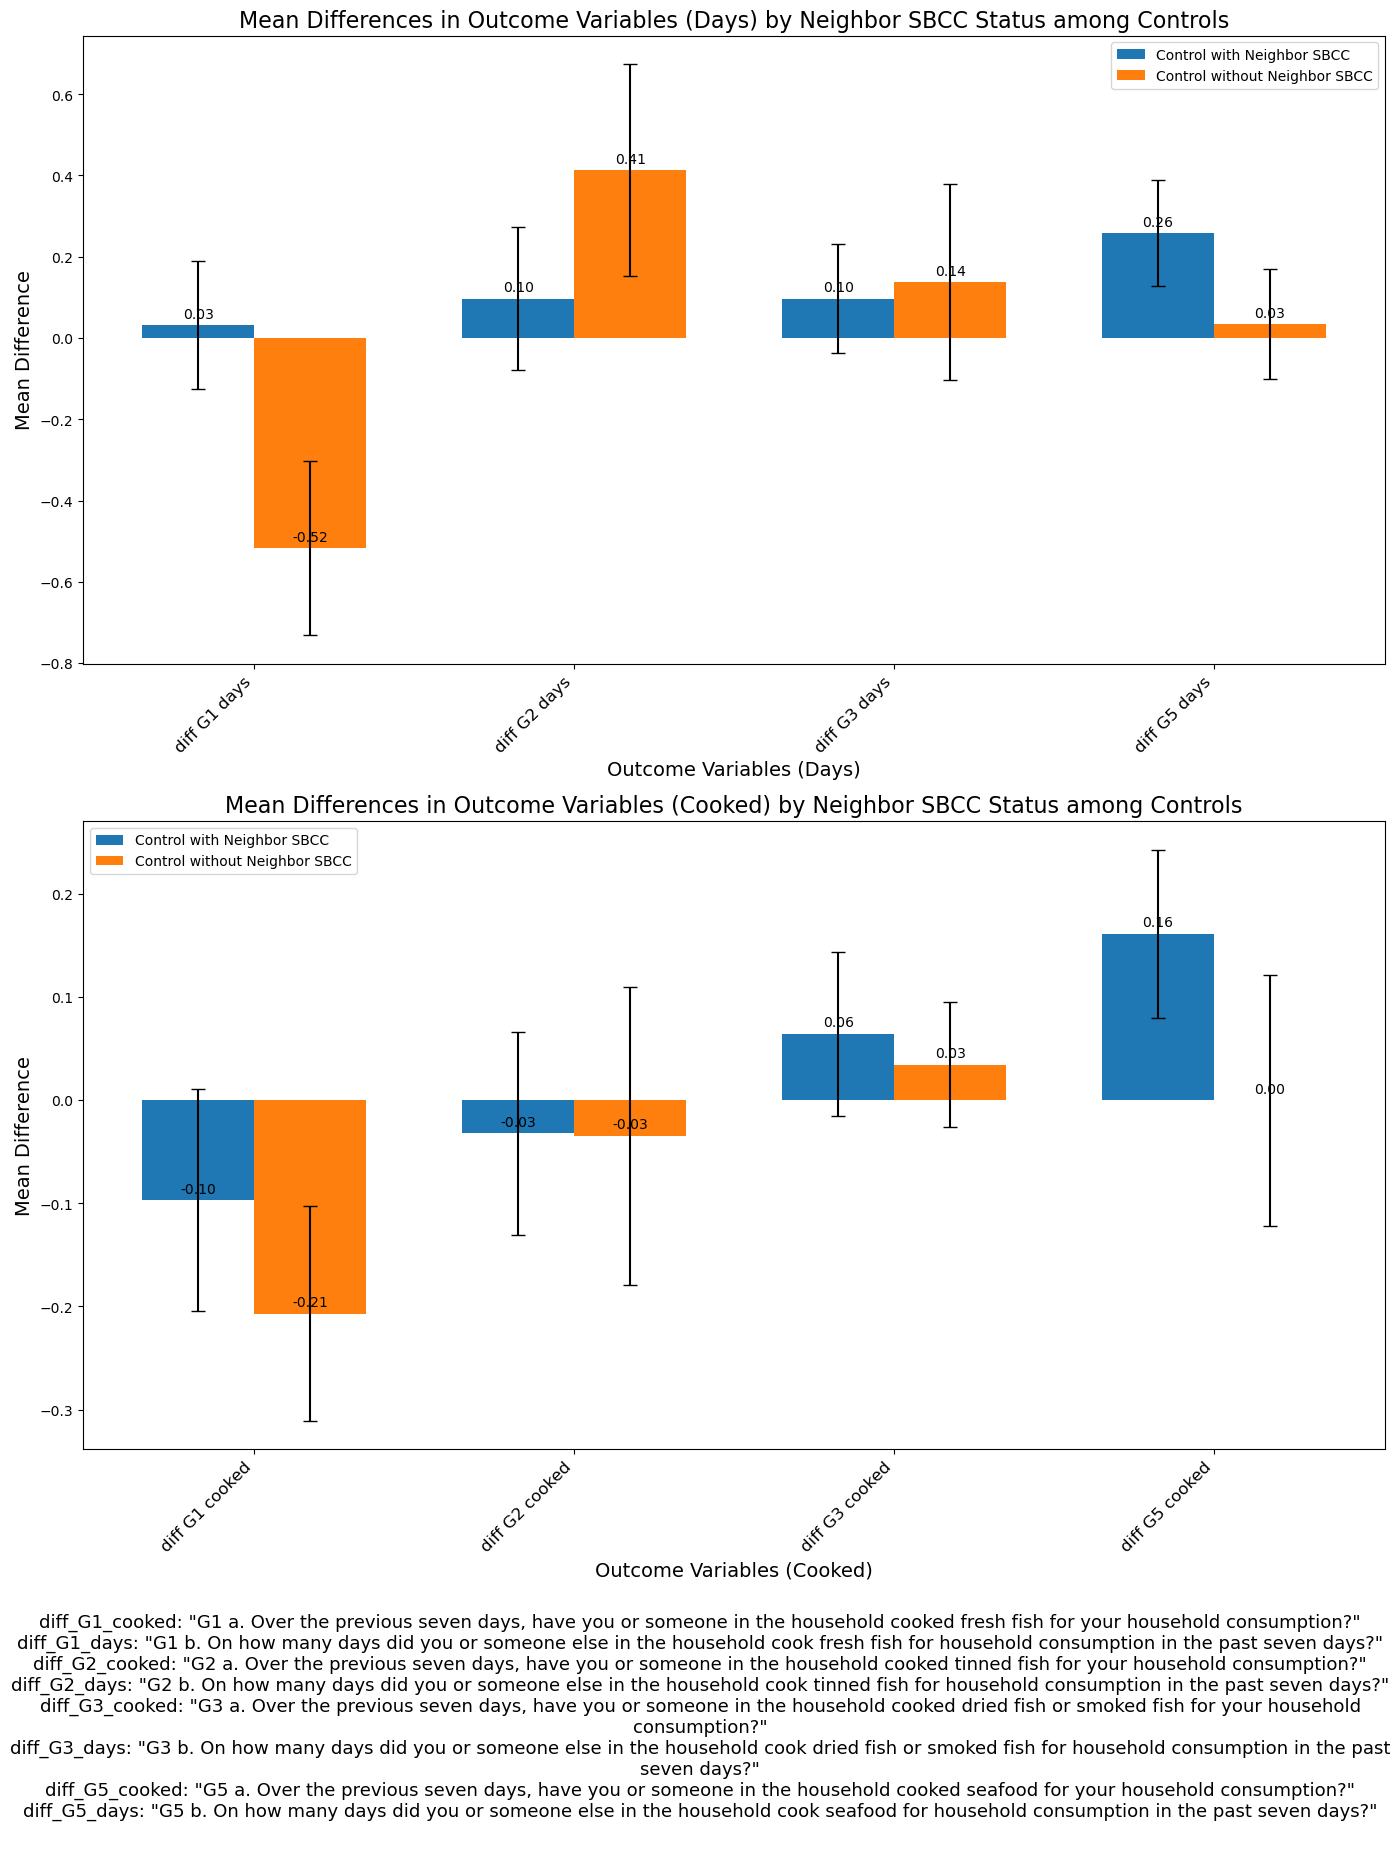

In [40]:
# Extracting results for plotting
variables_days = list(results_days.keys())
mean_control_with_neighbor_days = [results_days[var]['mean_control_with_neighbor_SBCC'] for var in variables_days]
mean_control_without_neighbor_days = [results_days[var]['mean_control_without_neighbor_SBCC'] for var in variables_days]

variables_cooked = list(results_cooked.keys())
mean_control_with_neighbor_cooked = [results_cooked[var]['mean_control_with_neighbor_SBCC'] for var in variables_cooked]
mean_control_without_neighbor_cooked = [results_cooked[var]['mean_control_without_neighbor_SBCC'] for var in variables_cooked]

x_days = np.arange(len(variables_days))  # the label locations
x_cooked = np.arange(len(variables_cooked))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(2, 1, figsize=(14, 16))

# Plot for 'days' variables
bars1 = axs[0].bar(x_days - width/2, mean_control_with_neighbor_days, width, label='Control with Neighbor SBCC')
bars2 = axs[0].bar(x_days + width/2, mean_control_without_neighbor_days, width, label='Control without Neighbor SBCC')

# Adding error bars
def add_error_bars(ax, bars, group_mask, variables):
    """
    Add error bars to the bars in a bar plot.

    Parameters:
    ax: plt.Axes
        The axes to add the error bars to.
    bars: plt.BarContainer
        The bars to add the error bars to.
    group_mask: pd.Series
        A boolean mask for selecting the data corresponding to the bars.
    variables: list of str
        The variables corresponding to the bars.
    """
    for bar, variable in zip(bars, variables):
        group_data = data[group_mask][variable].dropna()
        error = group_data.std() / np.sqrt(len(group_data))
        ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=error, capsize=5, color='black')

add_error_bars(axs[0], bars1, data['control_with_neighbor_500'], variables_days)
add_error_bars(axs[0], bars2, data['control_without_neighbor_500'], variables_days)

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_xlabel('Outcome Variables (Days)', fontsize=14)
axs[0].set_ylabel('Mean Difference', fontsize=14)
axs[0].set_title('Mean Differences in Outcome Variables (Days) by Neighbor SBCC Status among Controls', fontsize=16)
axs[0].set_xticks(x_days)
axs[0].set_xticklabels([var.replace('_', ' ') for var in variables_days], rotation=45, ha="right", fontsize=12)
axs[0].legend()

# Adding value labels on the bars
def add_value_labels(ax, bars):
     """
    Add value labels on the bars.

    Parameters:
    ax: plt.Axes
        The axes to add the value labels to.
    bars: plt.BarContainer
        The bars to add the value labels to.
    """
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(axs[0], bars1)
add_value_labels(axs[0], bars2)

# Plot for 'cooked' variables
bars3 = axs[1].bar(x_cooked - width/2, mean_control_with_neighbor_cooked, width, label='Control with Neighbor SBCC')
bars4 = axs[1].bar(x_cooked + width/2, mean_control_without_neighbor_cooked, width, label='Control without Neighbor SBCC')

add_error_bars(axs[1], bars3, data['control_with_neighbor_500'], variables_cooked)
add_error_bars(axs[1], bars4, data['control_without_neighbor_500'], variables_cooked)

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_xlabel('Outcome Variables (Cooked)', fontsize=14)
axs[1].set_ylabel('Mean Difference', fontsize=14)
axs[1].set_title('Mean Differences in Outcome Variables (Cooked) by Neighbor SBCC Status among Controls', fontsize=16)
axs[1].set_xticks(x_cooked)
axs[1].set_xticklabels([var.replace('_', ' ') for var in variables_cooked], rotation=45, ha="right", fontsize=12)
axs[1].legend()

add_value_labels(axs[1], bars3)
add_value_labels(axs[1], bars4)

fig.tight_layout()

# Legend of the full variable names
legend_text = """
diff_G1_cooked: "G1 a. Over the previous seven days, have you or someone in the household cooked fresh fish for your household consumption?"
diff_G1_days: "G1 b. On how many days did you or someone else in the household cook fresh fish for household consumption in the past seven days?"
diff_G2_cooked: "G2 a. Over the previous seven days, have you or someone in the household cooked tinned fish for your household consumption?"
diff_G2_days: "G2 b. On how many days did you or someone else in the household cook tinned fish for household consumption in the past seven days?"
diff_G3_cooked: "G3 a. Over the previous seven days, have you or someone in the household cooked dried fish or smoked fish for your household consumption?"
diff_G3_days: "G3 b. On how many days did you or someone else in the household cook dried fish or smoked fish for household consumption in the past seven days?"
diff_G5_cooked: "G5 a. Over the previous seven days, have you or someone in the household cooked seafood for your household consumption?"
diff_G5_days: "G5 b. On how many days did you or someone else in the household cook seafood for household consumption in the past seven days?"
"""

plt.figtext(0.5, -0.15, legend_text, wrap=True, horizontalalignment='center', fontsize=13, )

plt.show()

In [44]:
# Define the new outcome variables
outcome_variables = ['totalfishhhmv2_el', 'seafood_MDD', 'anyfish_EL']

In [45]:
# Restrict data to only relevant groups

only_target_data = data[(data['control_with_neighbor_500'] == True) | (data['control_without_neighbor_500'] == True)]

# Example ANOVA for one of the new outcome variables
for variable in outcome_variables:
    model = ols(f'{variable} ~ C(control_with_neighbor_500) + C(control_without_neighbor_500)', data=merged_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA Results for {variable}:')
    print(anova_table)


ANOVA Results for totalfishhhmv2_el:
                                       sum_sq     df         F    PR(>F)
C(control_with_neighbor_500)     1.744862e+03    1.0  0.006785  0.934391
C(control_without_neighbor_500)  7.908416e+05    1.0  3.075413  0.080246
Residual                         1.033742e+08  402.0       NaN       NaN
ANOVA Results for seafood_MDD:
                                    sum_sq     df         F    PR(>F)
C(control_with_neighbor_500)      0.138504    1.0  1.328386  0.249619
C(control_without_neighbor_500)   0.028382    1.0  0.272211  0.602073
Residual                         54.530525  523.0       NaN       NaN
ANOVA Results for anyfish_EL:
                                     sum_sq     df         F    PR(>F)
C(control_with_neighbor_500)       0.046189    1.0  0.194553  0.659294
C(control_without_neighbor_500)    0.108125    1.0  0.455438  0.499993
Residual                         161.200631  679.0       NaN       NaN


# Summary of ANOVA Test Results

This analysis examines the differences in outcome variables between control groups with and without neighbors who received the SBCC treatment.

## Key Findings

1. **`totalfishhhmv2_el`**:
   - **F-statistic for Controls with Neighbor SBCC**: 0.0068, **p-value**: 0.9344
   - **F-statistic for Controls without Neighbor SBCC**: 3.0754, **p-value**: 0.0802

   *Conclusion*: No statistically significant differences were observed between groups, indicating neighbor treatment status did not significantly affect total fish consumption.

2. **`seafood_MDD`**:
   - **F-statistic for Controls with Neighbor SBCC**: 1.3284, **p-value**: 0.2496
   - **F-statistic for Controls without Neighbor SBCC**: 0.2722, **p-value**: 0.6021

   *Conclusion*: There are no significant differences in seafood diversity scores based on the SBCC status of neighbors.

3. **`anyfish_EL`**:
   - **F-statistic for Controls with Neighbor SBCC**: 0.1946, **p-value**: 0.6593
   - **F-statistic for Controls without Neighbor SBCC**: 0.4554, **p-value**: 0.5000

   *Conclusion*: No significant differences were found in fish consumption between groups with or without treated neighbors.

## Overall Conclusion

The ANOVA results suggest that the presence of neighbors who received SBCC treatment does not significantly impact the fish and seafood consumption behaviors of control households. This indicates a lack of observable spillover effects based on the variables studied.
